Algorithms for Recovering Traces

In [2]:
import os
import numpy as np


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from Function import *
import scipy
#----------------- --------------------
x = np.load('data/data.npy')
maxiter = 100

# Select the Algorithm
# opt: FISTA, GAP, TWIST, ADMM
case = 'GAP' 


#----------------- FISTA --------------------
if case == 'FISTA':
    H = 0.75
    Alg = Algorithms(x,H , 'DCT2D', 'IDCT2D')

    tau = 0.1
    mu = 0.3
    x_result, hist = Alg.FISTA(tau, mu,maxiter)

# ------------------GAP--------------
if case == 'GAP':
    H = 0.75
    Alg = Algorithms(x,H, 'DCT2D', 'IDCT2D')
    tau = 1e-0
    x_result, hist = Alg.GAP(tau, maxiter) # inputs: tau, maxiter

# ------------------TwIST--------------
if case == 'TWIST':
    H = 0.75
    Alg = Algorithms(x,H, 'DCT2D', 'IDCT2D')
    # default parameters
    alpha = 1.2
    beta  = 1.998
    tau = 0.5

    x_result, hist = Alg.TwIST(tau, alpha, beta, maxiter)

# --------------- ADMM -----------------
if case == 'ADMM':
    H = 0.75
    Alg = Algorithms(x,H, 'DCT2D', 'IDCT2D')
    
    rho = 0.5
    gamma = 1
    lamnda = 0.0078

    x_result, hist = Alg.ADMM(rho, gamma, lamnda, maxiter)
# --------------------------------

#-------------- Visualization ----------------
x = Alg.x
cort = Alg.cort





---------GAP method---------- 

itr 	 ||x-xold|| 	 PSNR 

1 	 Error: 1.0000e+00 	 PSNR: 22.422 dB 

2 	 Error: 7.4405e-03 	 PSNR: 22.489 dB 

3 	 Error: 6.6422e-03 	 PSNR: 22.558 dB 

4 	 Error: 6.1725e-03 	 PSNR: 22.623 dB 

5 	 Error: 5.8581e-03 	 PSNR: 22.689 dB 

6 	 Error: 5.6190e-03 	 PSNR: 22.755 dB 

7 	 Error: 5.4272e-03 	 PSNR: 22.819 dB 

8 	 Error: 5.2699e-03 	 PSNR: 22.884 dB 

9 	 Error: 5.1372e-03 	 PSNR: 22.949 dB 

10 	 Error: 5.0237e-03 	 PSNR: 23.015 dB 

11 	 Error: 4.9235e-03 	 PSNR: 23.080 dB 

12 	 Error: 4.8340e-03 	 PSNR: 23.143 dB 

13 	 Error: 4.7502e-03 	 PSNR: 23.208 dB 

14 	 Error: 4.6702e-03 	 PSNR: 23.274 dB 

15 	 Error: 4.5920e-03 	 PSNR: 23.339 dB 

16 	 Error: 4.5211e-03 	 PSNR: 23.403 dB 

17 	 Error: 4.4580e-03 	 PSNR: 23.468 dB 

18 	 Error: 4.4007e-03 	 PSNR: 23.533 dB 

19 	 Error: 4.3448e-03 	 PSNR: 23.597 dB 

20 	 Error: 4.2861e-03 	 PSNR: 23.662 dB 

21 	 Error: 4.2285e-03 	 PSNR: 23.727 dB 

22 	 Error: 4.1704e-03 	 PSNR: 23.792 dB 

23 	 

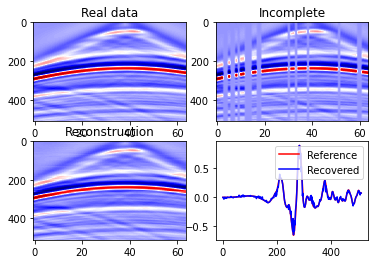

In [17]:
plt.rcParams.update({'font.size': 10, 'font.family': 'DejaVu Sans'})

plt.subplot(2, 2, 1), plt.imshow(x.T, cmap='seismic', aspect='auto')

plt.title('Real data')
y_gor = x.copy()
y_gor[cort,:]= 0
plt.subplot(2, 2, 2), plt.imshow(y_gor.T, cmap='seismic', aspect='auto')

plt.title('Incomplete')
plt.subplot(2, 2, 3), plt.imshow(x_result.T, cmap='seismic', aspect='auto')

plt.title('Reconstruction')
plt.subplot(2, 2, 4), plt.plot(x [cort [1], :], 'r', label='Reference')
plt.plot(x_result [cort [1], :], 'b', label='Recovered')

plt.legend()
plt.show()